## RF

----

### 1. Import Modules

In [1]:
import numpy as np
import pandas as pd
import cimcb as cb
from sklearn.model_selection import train_test_split

print('All packages successfully loaded')

Using TensorFlow backend.


All packages successfully loaded


### 2. Load data and peak sheet

In [2]:
home = 'data/' 
file = 'MTBLS93.xlsx' 

DataTable,PeakTable = cb.utils.load_dataXL(home + file, DataSheet='Data', PeakSheet='Peak') 

Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 2139 TOTAL PEAKS: 202
Done!


### 3. Extract X & Y

In [3]:
peaklist = PeakTable['Name']
DataTable2 = DataTable[(DataTable['Class']==0) | (DataTable['Class']==1)]
Y = DataTable2['Class'].values 

# Extract and scale the metabolite data from the DataTable
peaklist = PeakTable['Name']                           
XT = DataTable2[peaklist]                                    
XTlog = np.log(XT)                                          
XTscale = cb.utils.scale(XTlog, method='auto')              
XTknn = cb.utils.knnimpute(XTscale, k=3)  

### 4. Hyperparameters optimisation

In [ ]:
# param_dict
depth = list(range(1,5)) # The maximum depth of the tree. (default None)
feat = list(range(1,11)) # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_split = list(range(2,11)) # The minimum number of samples required to split an internal node. (default 2)
min_sam_leaf = list(range(1,11)) # The minimum number of samples required to be at a leaf node. (default 1)
est = [25, 50, 75, 100, 125, 150] # The number of trees in the forest. (default 100)

# Alternatives
est_range = list(range(1, 500)) # The number of trees in the forest. (default 100)
feat_asfraction = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, len(XTknn.T)] # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_leaf_asfraction = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # The minimum number of samples required to be at a leaf node.  (default 1)

# Set param_dict
param_dict = dict(max_depth=depth, max_features='sqrt', criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, n_estimators=est)

# Initalise
cv = cb.cross_val.kfold(model=cb.model.RF,                      
                                X=XTknn,                                 
                                Y=Y,                               
                                param_dict=param_dict,                   
                                folds=5,
                                n_mc=1)                                

# Run and plot
cv.run()  
cv.plot(metric='auc', ci=95, scale=1.3, color_beta=5)

In [ ]:
# param_dict
depth = list(range(1,5)) # The maximum depth of the tree. (default None)
feat = list(range(1,11)) # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_split = list(range(2,11)) # The minimum number of samples required to split an internal node. (default 2)
min_sam_leaf = list(range(1,11)) # The minimum number of samples required to be at a leaf node. (default 1)
est = [25, 50, 75, 100, 125, 150] # The number of trees in the forest. (default 100)

# Alternatives
est_range = list(range(1, 500)) # The number of trees in the forest. (default 100)
feat_asfraction = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, len(XTknn.T)] # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_leaf_asfraction = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # The minimum number of samples required to be at a leaf node.  (default 1)

# Set param_dict
param_dict = dict(max_depth=depth, max_features=feat, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, n_estimators=200)

# Initalise
cv = cb.cross_val.kfold(model=cb.model.RF,                      
                                X=XTknn,                                 
                                Y=Y,                               
                                param_dict=param_dict,                   
                                folds=5,
                                n_mc=1)                                

# Run and plot
cv.run()  
cv.plot(metric='auc', ci=95, scale=1.3, color_beta=5)

In [ ]:
# param_dict
depth = list(range(1,5)) # The maximum depth of the tree. (default None)
feat = list(range(1,11)) # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_split = list(range(2,11)) # The minimum number of samples required to split an internal node. (default 2)
min_sam_leaf = list(range(1,11)) # The minimum number of samples required to be at a leaf node. (default 1)
est = [25, 50, 75, 100, 125, 150] # The number of trees in the forest. (default 100)

# Alternatives
est_range = list(range(1, 500)) # The number of trees in the forest. (default 100)
feat_asfraction = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, len(XTknn.T)] # The number of features to consider when looking for the best split. (default sqrt(num_features))
min_sam_leaf_asfraction = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # The minimum number of samples required to be at a leaf node.  (default 1)

# Set param_dict
param_dict = dict(max_depth=None, max_features=feat, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, n_estimators=est)

# Initalise
cv = cb.cross_val.kfold(model=cb.model.RF,                      
                                X=XTknn,                                 
                                Y=Y,                               
                                param_dict=param_dict,                   
                                folds=5,
                                n_mc=1)                                

# Run and plot
cv.run()  
cv.plot(metric='auc', ci=95, scale=1.3, color_beta=5)

In [31]:
# param_dict
depth = list(range(1,11))
feat = list(range(1,11))
param_dict = dict(max_depth=depth, max_features=feat, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, n_estimators=10)


# Initalise
cv = cb.cross_val.kfold(model=cb.model.RF,                      
                                X=XTknn,                                 
                                Y=Y,                               
                                param_dict=param_dict,                   
                                folds=5,
                                n_mc=1)                                

# Run and plot
cv.run()  
cv.plot(metric='auc', ci=95, scale=1.3, color_beta=5)

Number of cores set to: 8
Running ...


100%|██████████| 100/100 [00:11<00:00, 11.73it/s]


Time taken: 0.21 minutes with 8 cores
Done!


Loading BokehJS ...

### 6. Get Model and Evaluate

In [4]:
# 6. Train, test and evaluate model

# Train model
model = cb.model.RF(max_depth=4, max_features=10, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, n_estimators=10)
model.train(XTknn, Y)
model.test(XTknn)

# Evaluate Ypred against Ytest
model.evaluate(cutoffscore=0.5, plot_median=False) 

Loading BokehJS ...

In [5]:
# Bootstrap evaluate

model.booteval(XTknn, Y, errorbar=False, bootnum=100) #errorbar=True, cutoffscore=0.5, specificity=0.8

100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


Loading BokehJS ...

### 7. Save table

In [6]:
home = 'tables/'
file = 'RF_MTBLS93_NH.xlsx'

model.save_table(home + file)

Done! Saved table as tables/RF_MTBLS93_NH.xlsx


In [7]:
import numpy as np
from sklearn import metrics

# Check booteval auc directly from plot (tpr, fpr)

# get fpr, tpr
fpr_ib = model.fpr_ib
fpr_oob = model.fpr_oob
tpr_ib = model.tpr_ib
tpr_oob = model.tpr_oob

# get auc using sklearn
auc_ib_scipy = metrics.auc(fpr_ib, tpr_ib)
auc_oob_scipy = metrics.auc(fpr_oob, tpr_oob)

# get auc using numpy (trapezoidal rule)
auc_ib_np = np.trapz(tpr_ib, fpr_ib)
auc_oob_np = np.trapz(tpr_oob, fpr_oob)

# print
print("auc_ib_scipy = {}".format(auc_ib_scipy))
print("auc_ib_numpy = {}".format(auc_ib_np))
print("auc_oob_scipy = {}".format(auc_oob_scipy))
print("auc_oob_numpy = {}".format(auc_oob_np))

auc_ib_scipy = 0.9580638475869914
auc_ib_numpy = 0.9580638475869914
auc_oob_scipy = 0.8913449394266173
auc_oob_numpy = 0.8913449394266173


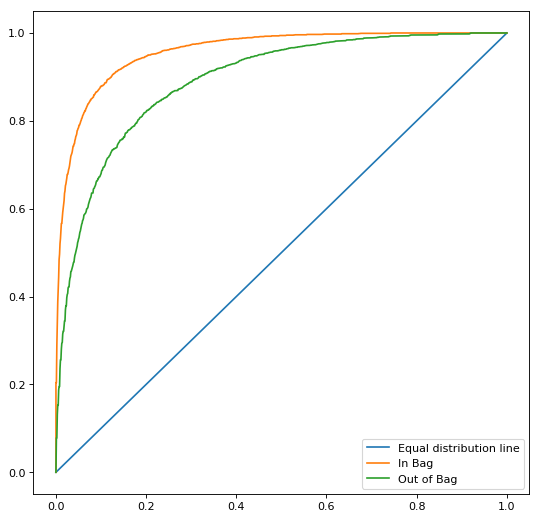

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

# Plot booteval tpr, fpr in matplotlib

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(fpr_ib, fpr_ib)
plt.plot(fpr_ib, tpr_ib)
plt.plot(fpr_oob, tpr_oob)

plt.legend(['Equal distribution line', 'In Bag', 'Out of Bag'], loc='lower right')

plt.show()